<a href="https://colab.research.google.com/github/vishalveerareddy/VGG16/blob/master/Image_Colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir /content/models/

In [0]:
!wget https://raw.githubusercontent.com/Mjrovai/Python4DS/master/Photo_Video_Colorization/model/colorization_deploy_v2.prototxt -O /content/models/colorization_deploy_v2.prototxt


--2019-11-12 17:20:57--  https://raw.githubusercontent.com/Mjrovai/Python4DS/master/Photo_Video_Colorization/model/colorization_deploy_v2.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9945 (9.7K) [text/plain]
Saving to: ‘/content/models/colorization_deploy_v2.prototxt’

/content/models/col 100%[===================>]   9.71K  --.-KB/s    in 0s      

2019-11-12 17:20:57 (99.7 MB/s) - ‘/content/models/colorization_deploy_v2.prototxt’ saved [9945/9945]



In [0]:
!wget http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2_norebal.caffemodel -O ./models/colorization_release_v2_norebal.caffemodel



--2019-11-12 17:06:03--  http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2_norebal.caffemodel
Resolving eecs.berkeley.edu (eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1
Connecting to eecs.berkeley.edu (eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2_norebal.caffemodel [following]
--2019-11-12 17:06:03--  https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2_norebal.caffemodel
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128946454 (123M)
Saving to: ‘./models/colorization_release_v2_norebal.caffemodel’

./models/c

In [0]:
!wget http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel -O ./models/colorization_release_v1.caffemodel


--2019-11-12 17:07:45--  http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel
Resolving eecs.berkeley.edu (eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1
Connecting to eecs.berkeley.edu (eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel [following]
--2019-11-12 17:07:45--  https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128948189 (123M)
Saving to: ‘./models/colorization_release_v1.caffemodel’

./models/colorizati 100%[=================

In [0]:
#https://github.com/Mjrovai/Python4DS/blob/master/Photo_Video_Colorization/model/pts_in_hull.npy

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
!pwd

/content


In [0]:
!ls

models	sample_data


In [0]:
!ls /content/models

colorization_release_v1.caffemodel  colorization_release_v2_norebal.caffemodel
colorization_release_v2.caffemodel


In [0]:
def colorize(IMAGE):   
    prototxt = "/content/models/colorization_deploy_v2.prototxt"
    model = "/content/models/colorization_release_v2.caffemodel"
    points = "/content/models/pts_in_hull.npy"
    image =  "/content/"+IMAGE

    net = cv2.dnn.readNetFromCaffe(prototxt, model)
    pts = np.load(points)

    class8 = net.getLayerId("class8_ab")
    conv8 = net.getLayerId("conv8_313_rh")
    pts = pts.transpose().reshape(2, 313, 1, 1)
    net.getLayer(class8).blobs = [pts.astype("float32")]
    net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    scaled = image.astype("float32") / 255.0
    lab = cv2.cvtColor(scaled, cv2.COLOR_RGB2LAB)

    resized = cv2.resize(lab, (224, 224))
    L = cv2.split(resized)[0]
    L -= 50

    net.setInput(cv2.dnn.blobFromImage(L))
    ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
    ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

    L = cv2.split(lab)[0]
    colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)
    colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2RGB)
    colorized = np.clip(colorized, 0, 1)
    colorized = (255 * colorized).astype("uint8")
    

    plt.figure(1, figsize=(14,6))
    plt.subplots_adjust(wspace=0.1)
    plt.subplot(121)
    plt.axis('off');
    plt.imshow(image)

    plt.subplot(122)
    plt.axis('off');
    plt.imshow(colorized)
    
    return colorized


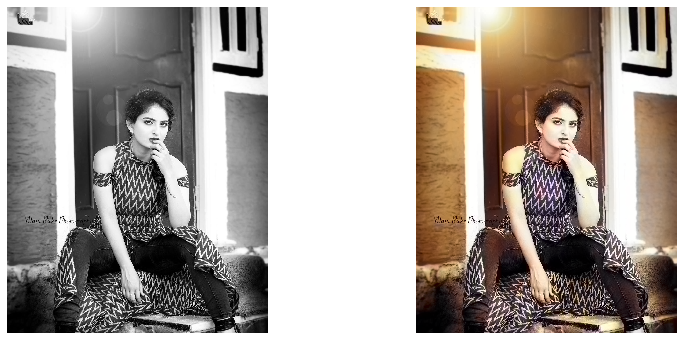

In [0]:

IMAGE =  "test.jpg"
color = colorize(IMAGE)